In [1]:
import requests
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [2]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

## Getting the Playilsts

In [4]:
playlist60 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXaKIA8E7WcJj")
playlist70 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTJ7xPn4vNaz")
playlist80 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX4UtSsGT1Sbe")
playlist90 = sp.user_playlist_tracks("spotify", "37i9dQZF1DXbTxeAdrVG2l")
playlist00 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX4o1oenSJRJd")
playlist10 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX5Ejj0EkURtP")

In [5]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [6]:
playlist60s=get_playlist_tracks('37i9dQZF1DXaKIA8E7WcJj')
playlist70s=get_playlist_tracks('37i9dQZF1DWTJ7xPn4vNaz')
playlist80s=get_playlist_tracks('37i9dQZF1DX4UtSsGT1Sbe')
playlist90s=get_playlist_tracks('37i9dQZF1DXbTxeAdrVG2l')
playlist00s=get_playlist_tracks('37i9dQZF1DX4o1oenSJRJd')
playlist10s=get_playlist_tracks('37i9dQZF1DX5Ejj0EkURtP')

## Getting Music Data from Playlists

In [7]:
def get_artists(playlist):
    artists=[]

    for i in range(len(playlist)):
        artist=playlist[i]["track"]["artists"][0]['name']
        artists.append(artist)
    
    return (artists)

In [8]:
def get_titles(playlist):
    titles=[]

    for i in range(len(playlist)):
        title=playlist[i]["track"]["name"]
        titles.append(title)
    
    return (titles)

In [9]:
def get_features(playlist):
    song_audio_features=[]
    
    for i in range(len(playlist)):
        song_uri = playlist[i]["track"]["uri"]
        song_af = sp.audio_features(song_uri)
        song_audio_features.append(song_af)
    
    return (song_audio_features)

In [10]:
artists60s = get_artists(playlist60s)
songs60s = get_titles(playlist60s)
features60s = get_features(playlist60s)
artists70s = get_artists(playlist70s)
songs70s = get_titles(playlist70s)
features70s = get_features(playlist70s)
artists80s = get_artists(playlist80s)
songs80s = get_titles(playlist80s)
features80s = get_features(playlist80s)
artists90s = get_artists(playlist90s)
songs90s = get_titles(playlist90s)
features90s = get_features(playlist90s)
artists00s = get_artists(playlist00s)
songs00s = get_titles(playlist00s)
features00s = get_features(playlist00s)
artists10s = get_artists(playlist10s)
songs10s = get_titles(playlist10s)
features10s = get_features(playlist10s)

In [11]:
artists60s = pd.DataFrame(artists60s,columns =['Artists'])
songs60s = pd.DataFrame(songs60s,columns =['Song Title'])
artists70s = pd.DataFrame(artists70s,columns =['Artists'])
songs70s = pd.DataFrame(songs70s,columns =['Song Title'])
artists80s = pd.DataFrame(artists80s,columns =['Artists'])
songs80s = pd.DataFrame(songs80s,columns =['Song Title'])
artists90s = pd.DataFrame(artists90s,columns =['Artists'])
songs90s = pd.DataFrame(songs90s,columns =['Song Title'])
artists00s = pd.DataFrame(artists00s,columns =['Artists'])
songs00s = pd.DataFrame(songs00s,columns =['Song Title'])
artists10s = pd.DataFrame(artists10s,columns =['Artists'])
songs10s = pd.DataFrame(songs10s,columns =['Song Title'])

In [12]:
features60 = pd.DataFrame(features60s)
features70 = pd.DataFrame(features60s)
features80 = pd.DataFrame(features60s)
features90 = pd.DataFrame(features60s)
features00 = pd.DataFrame(features60s)
features10 = pd.DataFrame(features60s)

In [13]:
audio_features_60s = pd.DataFrame(features60[0].tolist())
audio_features_60s = audio_features_60s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
audio_features_70s = pd.DataFrame(features70[0].tolist())
audio_features_70s = audio_features_70s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
audio_features_80s = pd.DataFrame(features80[0].tolist())
audio_features_80s = audio_features_80s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
audio_features_90s = pd.DataFrame(features90[0].tolist())
audio_features_90s = audio_features_90s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
audio_features_00s = pd.DataFrame(features00[0].tolist())
audio_features_00s = audio_features_00s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
audio_features_10s = pd.DataFrame(features10[0].tolist())
audio_features_10s = audio_features_10s.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)

In [92]:
the60s = pd.concat([artists60s, songs60s, audio_features_60s], axis=1)
the70s = pd.concat([artists70s, songs70s, audio_features_70s], axis=1)
the80s = pd.concat([artists80s, songs80s, audio_features_80s], axis=1)
the90s = pd.concat([artists90s, songs90s, audio_features_90s], axis=1)
the00s = pd.concat([artists00s, songs00s, audio_features_00s], axis=1)
the10s = pd.concat([artists10s, songs10s, audio_features_10s], axis=1)

master_playlist = pd.concat([the60s, the70s, the80s, the90s, the00s, the10s])
master_playlist = master_playlist.reset_index()
master_playlist = master_playlist.drop(['index'], axis=1)

In [153]:
master_playlist["Artists"] = master_playlist["Artists"].str.lower()
master_playlist["Song Title"] = master_playlist["Song Title"].str.lower()

In [154]:
master_playlist.head()

,Artists,Song Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,ben e. king,stand by me,0.653,0.334,9,-6.955,1,0.0313,0.411000,0.000035,0.1230,0.665,119.460
1,percy sledge,when a man loves a woman,0.526,0.436,1,-6.020,1,0.0232,0.098100,0.000008,0.1180,0.286,96.903
2,the rolling stones,(i can't get no) satisfaction - mono version,0.731,0.837,9,-8.673,1,0.0477,0.000287,0.150000,0.0978,0.832,135.603
3,sam cooke,(what a) wonderful world,0.691,0.507,11,-10.230,1,0.0343,0.627000,0.000000,0.4570,0.885,128.518
4,van morrison,brown eyed girl,0.491,0.583,7,-10.964,1,0.0376,0.185000,0.000000,0.4060,0.908,150.566


## Adding my Hot Playlist

In [16]:
url = "https://www.billboard.com/charts/hot-100/"
response = requests.get(url)
response.status_code

200

In [17]:
soup = BeautifulSoup(response.content, "html.parser")
soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max")

[<li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-1@mobile-max">
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 All Too Well (Taylor's Version)
 </h3>
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 Taylor Swift
 </span>
 </li>]

In [18]:
titles = []
for title in soup.select("h3")[4:104]:
    titles.append(title.get_text().strip())

artists = []
for artist in soup.select("li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max > span"):
    artists.append(artist.get_text().strip())

In [19]:
hot_100 = pd.DataFrame({'artist':artists,'title':titles})

In [150]:
hot_100["artist"] = hot_100["artist"].str.lower()
hot_100["title"] = hot_100["title"].str.lower()

In [151]:
hot_100.head()

,artist,title
0,taylor swift,all too well (taylor's version)
1,adele,easy on me
2,the kid laroi & justin bieber,stay
3,lil nas x & jack harlow,industry baby
4,silk sonic (bruno mars & anderson .paak),smokin out the window


In [173]:
hot_100.to_csv('hot_100.csv')

## Start of Clustering

In [94]:
X = master_playlist.drop(['Artists','Song Title'], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.653,0.3340,9,-6.955,1,0.0313,0.411000,0.000035,0.1230,0.665,119.460
1,0.526,0.4360,1,-6.020,1,0.0232,0.098100,0.000008,0.1180,0.286,96.903
2,0.731,0.8370,9,-8.673,1,0.0477,0.000287,0.150000,0.0978,0.832,135.603
3,0.691,0.5070,11,-10.230,1,0.0343,0.627000,0.000000,0.4570,0.885,128.518
4,0.491,0.5830,7,-10.964,1,0.0376,0.185000,0.000000,0.4060,0.908,150.566
...,...,...,...,...,...,...,...,...,...,...,...
895,0.311,0.0264,0,-21.644,1,0.0370,0.731000,0.002050,0.1560,0.139,120.653
896,0.605,0.4550,5,-8.903,0,0.0301,0.595000,0.000000,0.0816,0.678,106.825
897,0.546,0.8180,0,-4.890,1,0.0310,0.048700,0.000000,0.0983,0.756,138.561
898,0.563,0.4410,4,-9.902,1,0.0437,0.773000,0.000000,0.3510,0.468,115.168


In [95]:
X_prep = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

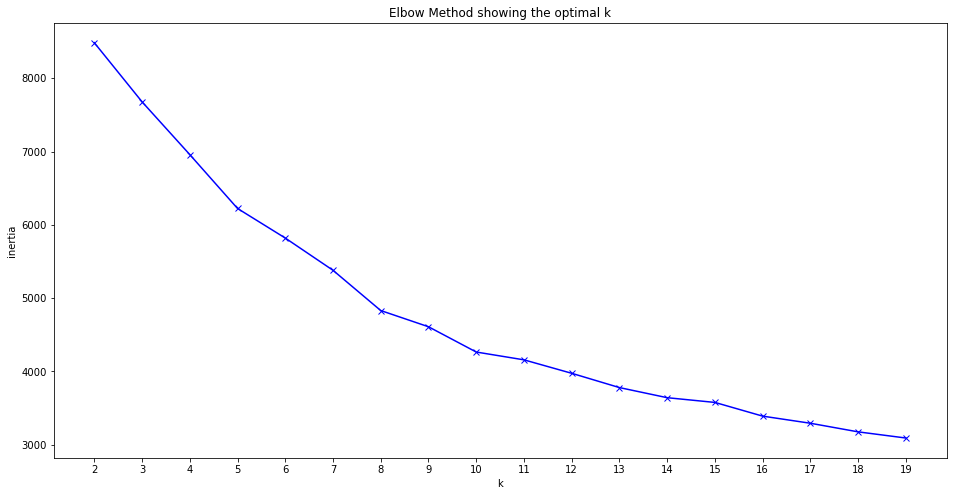

In [96]:
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

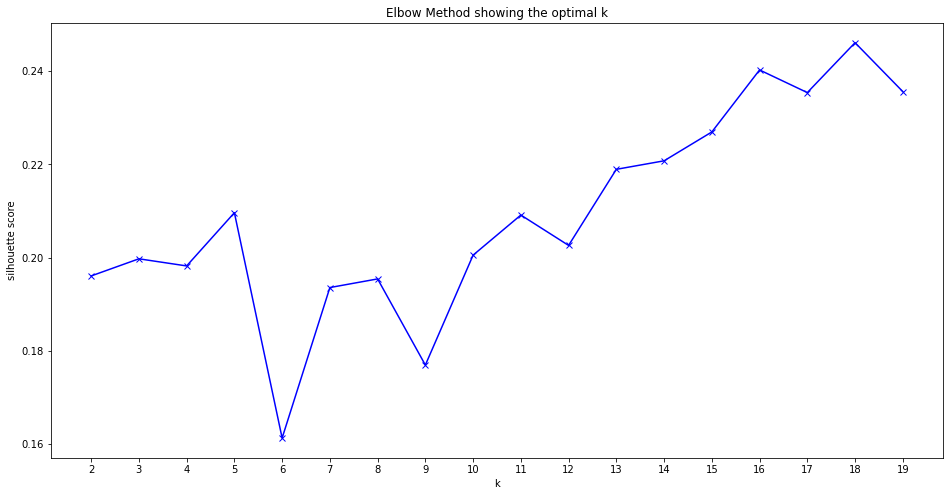

In [97]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [98]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    186
1    108
2    474
3      6
4    126
dtype: int64

In [155]:
final_master_playlist = pd.concat([master_playlist, pd.Series(clusters)], axis=1)
final_master_playlist = final_master_playlist.rename(columns={"Artists": "artists", "Song Title": "song", 0:"cluster"})
final_master_playlist

,artists,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,ben e. king,stand by me,0.653,0.3340,9,-6.955,1,0.0313,0.411000,0.000035,0.1230,0.665,119.460,2
1,percy sledge,when a man loves a woman,0.526,0.4360,1,-6.020,1,0.0232,0.098100,0.000008,0.1180,0.286,96.903,0
2,the rolling stones,(i can't get no) satisfaction - mono version,0.731,0.8370,9,-8.673,1,0.0477,0.000287,0.150000,0.0978,0.832,135.603,2
3,sam cooke,(what a) wonderful world,0.691,0.5070,11,-10.230,1,0.0343,0.627000,0.000000,0.4570,0.885,128.518,2
4,van morrison,brown eyed girl,0.491,0.5830,7,-10.964,1,0.0376,0.185000,0.000000,0.4060,0.908,150.566,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,rita ora,your song,0.311,0.0264,0,-21.644,1,0.0370,0.731000,0.002050,0.1560,0.139,120.653,0
896,sia,chandelier,0.605,0.4550,5,-8.903,0,0.0301,0.595000,0.000000,0.0816,0.678,106.825,4
897,jonas blue,mama,0.546,0.8180,0,-4.890,1,0.0310,0.048700,0.000000,0.0983,0.756,138.561,2
898,james tw,when you love someone,0.563,0.4410,4,-9.902,1,0.0437,0.773000,0.000000,0.3510,0.468,115.168,0


In [174]:
final_master_playlist.to_csv('final_master_playlist.csv')

### Defining a function to look up inputed songs

In [107]:
def get_features_song(song_title):

    song_uri = results['tracks']['items'][0]["uri"]
    song_af = sp.audio_features(song_uri)
    song_af_df = pd.DataFrame(song_af)
    song_af_df = song_af_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
    song_af_df = StandardScaler().fit_transform(song_af_df)
    
    return (song_af_df)

In [108]:
def get_cluster_song(song_title):
    
    song=get_features_song(song_title)
    cluster = kmeans.predict(song)
    
    return (cluster)

## Beggining of the Sugester

In [159]:
song_title, artist_name = input("Enter song title and artist name separated by a comma: ").lower().split(",")
print("song title: ", song_title)
print("artist name: ", artist_name.strip())

Enter song title and artist name separated by a comma: Let it be, the beatles
song title:  let it be
artist name:  the beatles


In [166]:
from random import choice

if (len(hot_100[hot_100['title'].str.contains(song_title)])>0):
    input_index = hot_100.index[hot_100['title'] == song_title].tolist()
    output_index = choice([i for i in range(0,9) if i not in [input_index]])
    print('Try listening to: ' + hot_100['title'].values[output_index] + ' by ' +  hot_100['artist'].values[output_index])
else:
    input_cluster = get_cluster_song(song_title)
    temp_df = final_master_playlist[final_master_playlist['cluster'] == input_cluster[0]]
    output_index = randint(0,len(temp_df))
    print('Try listening to: ' + temp_df['song'].values[output_index] + ' by ' +  temp_df['artists'].values[output_index])

Try listening to: show me heaven - from "days of thunder" by maria mckee


In [169]:
song_title, artist_name = input("Enter song title and artist name separated by a comma: ").lower().split(",")
print("song title: ", song_title)
print("artist name: ", artist_name.strip())
    
from random import choice
answer = 'y'
    
while answer == 'y':
    if (len(hot_100[hot_100['title'].str.contains(song_title)])>0):
        input_index = hot_100.index[hot_100['title'] == song_title].tolist()
        output_index = choice([i for i in range(0,9) if i not in [input_index]])
        print('Try listening to: ' + hot_100['title'].values[output_index] + ' by ' +  hot_100['artist'].values[output_index])
        answer = input("Do you want another suggestion? y/n").lower()
    else:
        input_cluster = get_cluster_song(song_title)
        temp_df = final_master_playlist[final_master_playlist['cluster'] == input_cluster[0]]
        output_index = randint(0,len(temp_df))
        print('Try listening to: ' + temp_df['song'].values[output_index] + ' by ' +  temp_df['artists'].values[output_index])
        answer = input("Do you want another suggestion? y/n").lower()
    

Enter song title and artist name separated by a comma: Die Polizie, Kaizers Orchestra
song title:  die polizie
artist name:  kaizers orchestra
Try listening to: save the last dance for me by the drifters
Do you want another suggestion? y/ny
Try listening to: up where we belong by joe cocker
Do you want another suggestion? y/ny
Try listening to: don't stop believin' by journey
Do you want another suggestion? y/ny
Try listening to: every little thing she does is magic by the police
Do you want another suggestion? y/ny
Try listening to: you'll be in my heart by phil collins
Do you want another suggestion? y/nn
